In [89]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts} \usepackage{accents} \usepackage{mathrsfs} \usepackage{bm}',
    'figure.dpi': 200
})

In [91]:
#WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')
#SAVE_PATH = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/Papers/parabolische_inverse_probleme/figures/experiments')
#SAVE_PATH = Path('/home/benedikt/Dokumente/Paper/parabolische_inverse_probleme/figures/experiments')

data_dir_path = WORK_DIR / Path('experiments/test_enrichment_strategy')

# FOM_data_path = data_dir_path / 'reaction_FOM_300_non_time_dep'
TR_data_paths = [
    data_dir_path / 'reaction_TR_non_time_dep_1e-9',
    data_dir_path / 'reaction_TR_non_time_dep_1e-12',
    data_dir_path / 'reaction_TR_non_time_dep_1e-12_1e-9',
    data_dir_path / 'reaction_TR_non_time_dep_1e-16',
    data_dir_path / 'reaction_TR_non_time_dep_1e-16_1e-6',
    data_dir_path / 'reaction_TR_non_time_dep_1e-16_1e-9',
]
# TR_data_paths = [
#     data_dir_path / 'diffusion_TR_non_time_dep_1e-9',
#     data_dir_path / 'diffusion_TR_non_time_dep_1e-12',
#     data_dir_path / 'diffusion_TR_non_time_dep_1e-12_1e-9',
#     data_dir_path / 'diffusion_TR_non_time_dep_1e-16',
#     data_dir_path / 'diffusion_TR_non_time_dep_1e-16_1e-6',
#     data_dir_path / 'diffusion_TR_non_time_dep_1e-16_1e-9',
# ]
# TR_data_paths = [
#     data_dir_path / 'reaction_TR_time_dep_1e-9',
#     data_dir_path / 'reaction_TR_time_dep_1e-12',
#     data_dir_path / 'reaction_TR_time_dep_1e-12_1e-9',
#     data_dir_path / 'reaction_TR_time_dep_1e-16',
#     data_dir_path / 'reaction_TR_time_dep_1e-16_1e-6',
#     data_dir_path / 'reaction_TR_time_dep_1e-16_1e-9',
# ]
# TR_data_paths = [
#     #data_dir_path / 'diffusion_TR_time_dep_1e-9',
#     data_dir_path / 'diffusion_TR_time_dep_1e-12',
#     data_dir_path / 'diffusion_TR_time_dep_1e-12_1e-9',
#     data_dir_path / 'diffusion_TR_time_dep_1e-16',
#     data_dir_path / 'diffusion_TR_time_dep_1e-16_1e-6',
#     data_dir_path / 'diffusion_TR_time_dep_1e-16_1e-9',
# ]



setup_path = TR_data_path / 'setup.pkl'
optimizer_parameter_path = TR_data_path / 'optimizer_parameter.pkl'


with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM, grid_data, assembled_products = build_InstationaryModelIP(setup=setup)
    

data = {}

if TR_data_paths:
    for TR_data_path in TR_data_paths:
        with open(TR_data_path / 'TR_IRGNM_final.pkl', 'rb') as file:
            TR_data = load(file)
            
        data[str(TR_data_path.stem)] = TR_data
        
    


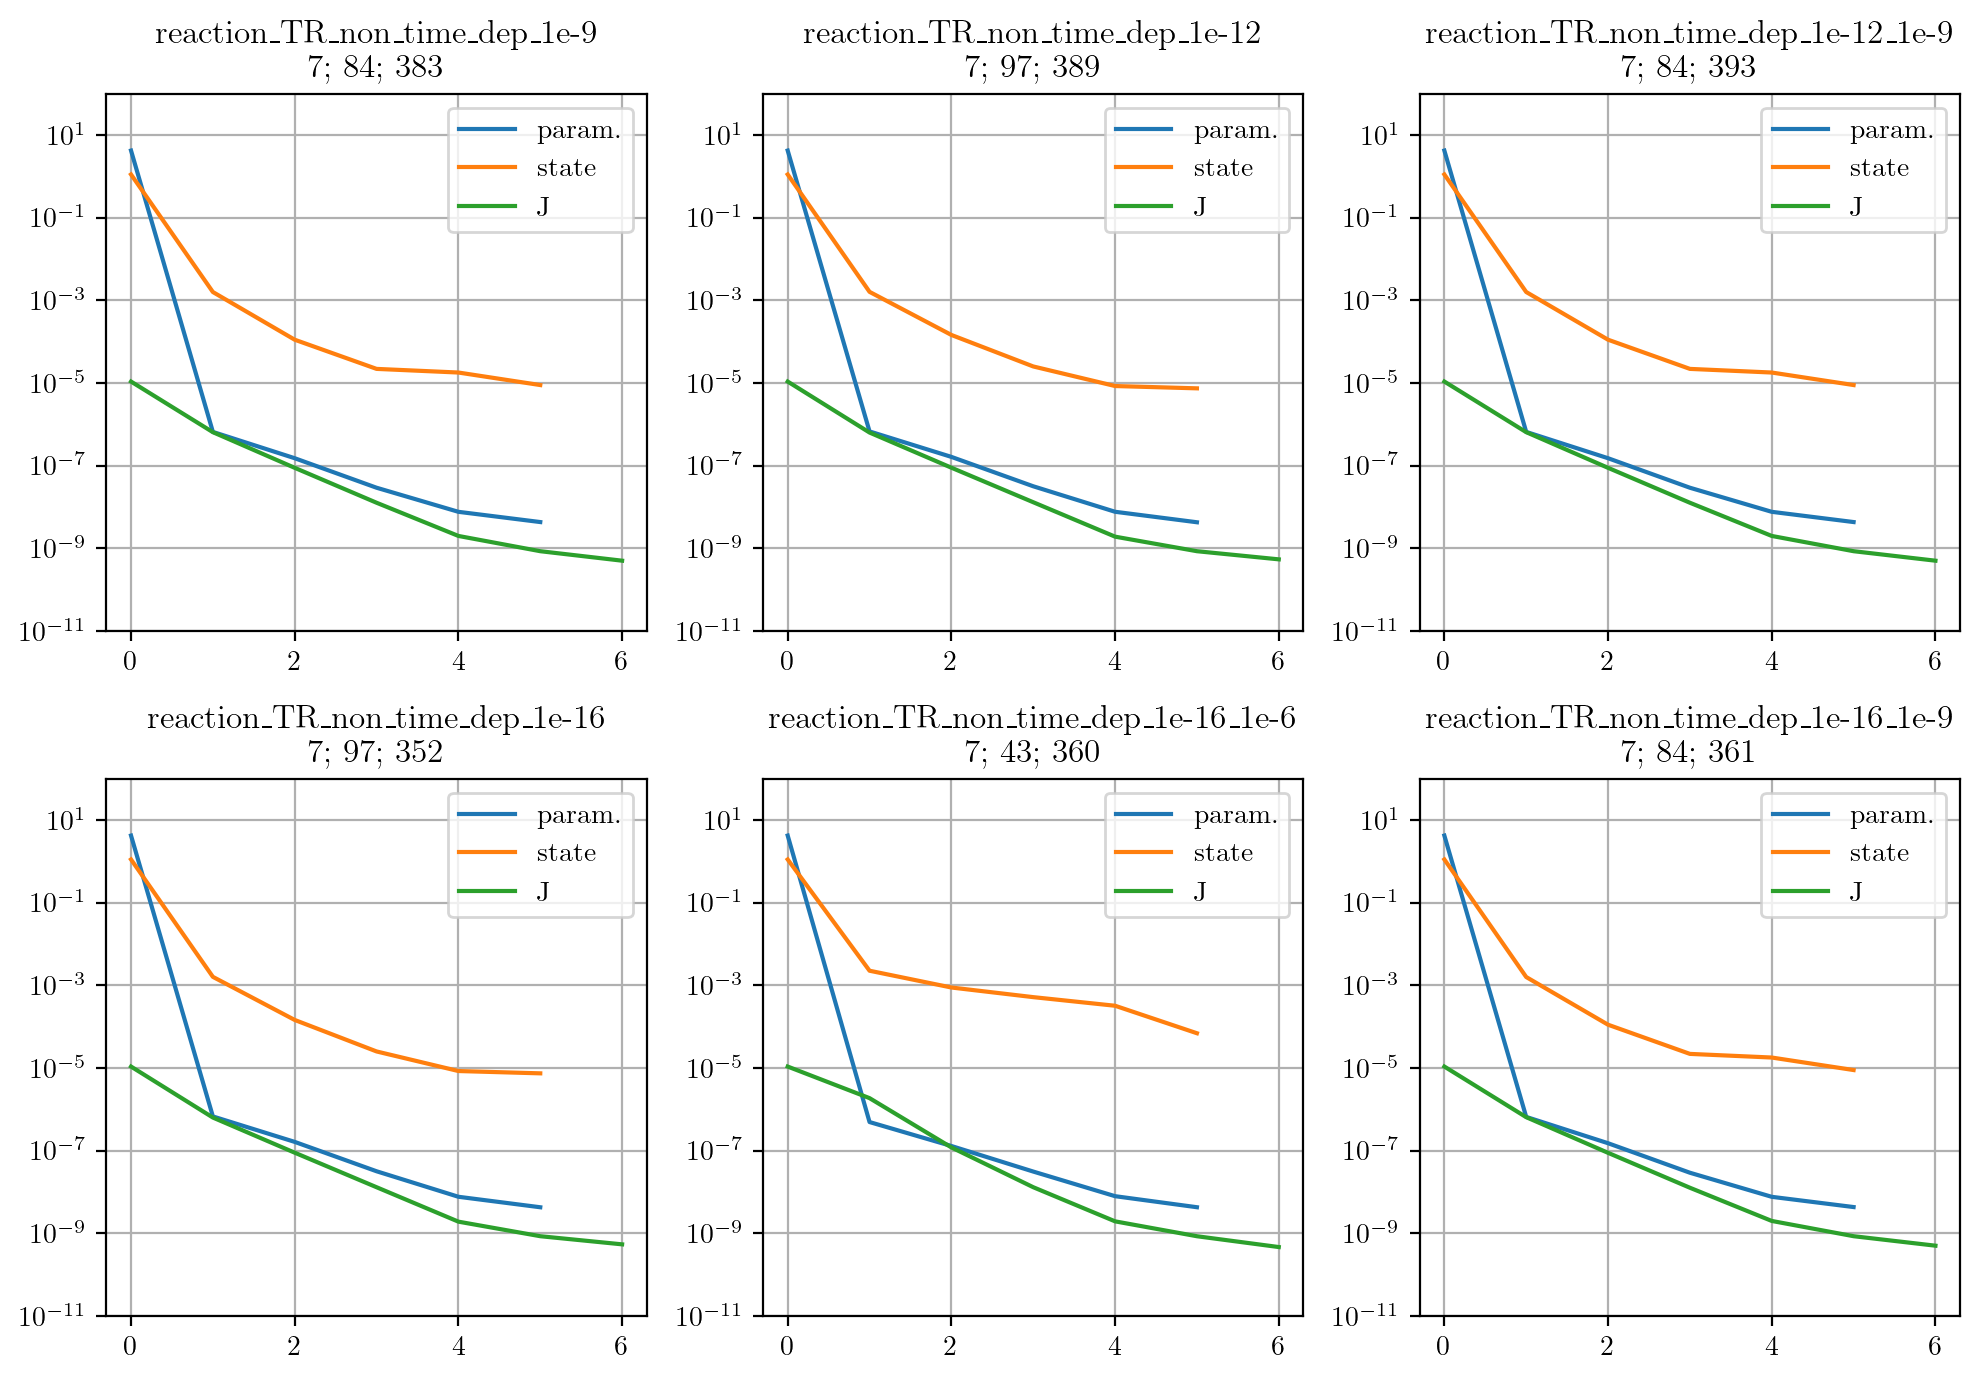

In [92]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,7))
ax = ax.flatten()

for i, key in enumerate(data.keys()):


    snapshot_projection_error = data[key]['extention_stats']['snapshot_projection_error']
    ax[i].plot(snapshot_projection_error['parameter_basis'], label='param.')
    ax[i].plot(snapshot_projection_error['state_basis'], label='state')
    ax[i].plot(data[key]['J'], label='J')
    #ax[i].plot(data[key]['rel_est_error_J_r'], label='err. J_r')
    
    dim_Q_r = data[key]['dim_Q_r'][-1]
    dim_V_r = data[key]['dim_V_r'][-1]
    tot_time = data[key]['total_runtime'][-1]
    
    ax[i].set_title(key + f'\n {dim_Q_r}; {dim_V_r}; {int(tot_time)}')
    ax[i].set_yscale('log')
    ax[i].grid()
    ax[i].set_ylim([1e-11,1e2])
    ax[i].legend()

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,7))
ax = ax.flatten()

for i, key in enumerate(data.keys()):


    snapshot_projection_error = data[key]['extention_stats']['snapshot_projection_error']
    ax[i].plot(snapshot_projection_error['parameter_basis'], label='param.')
    ax[i].plot(snapshot_projection_error['state_basis'], label='state')
    ax[i].plot(data[key]['J'], label='J')
    #ax[i].plot(data[key]['rel_est_error_J_r'], label='err. J_r')
    
    dim_Q_r = data[key]['dim_Q_r'][-1]
    dim_V_r = data[key]['dim_V_r'][-1]
    tot_time = data[key]['total_runtime'][-1]
    
    ax[i].set_title(key + f'\n {dim_Q_r}; {dim_V_r}; {int(tot_time)}')
    ax[i].set_yscale('log')
    ax[i].grid()
    ax[i].set_ylim([1e-11,1e2])
    ax[i].legend()

fig.tight_layout()

In [ ]:
# from RBInvParam.products import BochnerProductOperator

# q_FOM = data['FOM']['q'][-1]
# q_TR = data['TR']['q'][-1]

# #nt = setup['dims']['nt']
# nt = 1

# bochner_L2 = BochnerProductOperator(
#     product=NumpyMatrixOperator(
#         matrix = assembled_products['l2'],
#         source_id = FOM.Q.id,
#         range_id = FOM.Q.id
#     ),
#     delta_t=setup['model_parameter']['delta_t'],
#     space = FOM.Q,
#     nt = nt
# )

# print("L2 rel error:")
# result = np.sqrt(bochner_L2.apply2(q_FOM-q_TR, q_FOM-q_TR)[0,0]) / np.sqrt(bochner_L2.apply2(q_FOM, q_FOM)[0,0]) * 100
# print(f"{result:.2f}")


# bochner_H1 = BochnerProductOperator(
#     product=NumpyMatrixOperator(
#         matrix = assembled_products['h1'],
#         source_id = FOM.Q.id,
#         range_id = FOM.Q.id
#     ),
#     delta_t=setup['model_parameter']['delta_t'],
#     space = FOM.Q,
#     nt = nt
# )

# print("H1 rel error:")
# result = np.sqrt(bochner_H1.apply2(q_FOM-q_TR, q_FOM-q_TR)[0,0]) / np.sqrt(bochner_H1.apply2(q_FOM, q_FOM)[0,0]) * 100
# print(f"{result:.2f}")

